<a href="https://colab.research.google.com/github/brunogtds/datavisualization_Python/blob/main/relacoesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
random= np.random.seed(50)
random

In [3]:
plt.figure(figsize=(12,4))
np.random.seed(99)
x= np.linspace(-10, 10, 100)
y1= 2*(x + np.random.rand(len(x)) * 0.5) + 1
y2= (x + np.random.rand(len(x)) * 0.5) ** 2

<Figure size 1200x400 with 0 Axes>

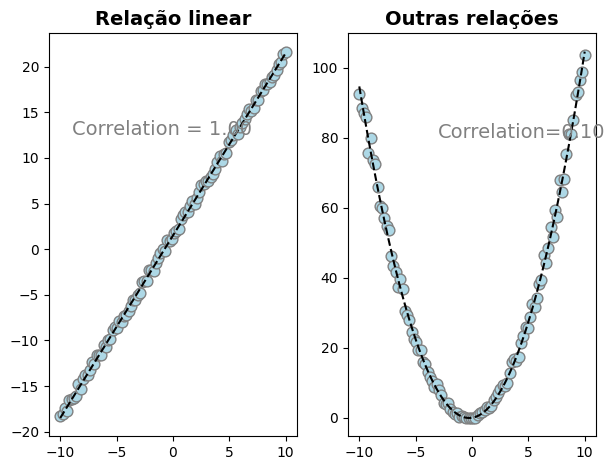

In [4]:
plt.subplot(1,2,1)
plt.scatter(x, y1, color='lightblue', s=60, edgecolors='grey')
z= np.polyfit(x, y1, 1)
p= np.poly1d(z)

plt.plot(x, p(x), color='k', linestyle='dashed')
plt.title('Relação linear', fontsize=14, weight='bold')
plt.text(-9,12.5,f'Correlation = {np.corrcoef(x,y1)[0,1]:.2f}', fontsize=14, color='grey')

plt.subplot(1,2,2)
plt.scatter(x,y2, color='lightblue', s=60, edgecolors='grey')

z=np.polyfit(x, y2, 2)
p=np.poly1d(z)
plt.plot(x,p(x),color='k', linestyle='dashed')
plt.title('Outras relações', fontsize=14, weight='bold')
plt.text(-3,80,f'Correlation={np.corrcoef(x,y2)[0,1]:.2f}', fontsize=14, color='grey')

plt.tight_layout()
plt.show()

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')

In [6]:
df['cod_continent'] = df[['continent']].astype('category').apply(lambda x: x.cat.codes)

In [7]:
df.head()

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index,LifeExpect,HappyIdx,SchoolYears15_24,VacineBelieve,ChildMortality,Co2Emissions,CPI,Population,cod_continent
0,Africa,Botswana,2015,78.7,15700,32.1,24.7,60.5,66.9,0.376,8.40,NaN,40.7,2.560,63.0,2120000,0
1,Africa,Burkina Faso,2015,47.0,1600,24.3,15.1,35.5,60.7,0.442,3.76,NaN,86.8,0.182,38.0,18100000,0
2,Africa,Cote d'Ivoire,2015,33.1,3230,20.1,15.4,41.6,61.0,0.445,6.59,NaN,90.0,0.405,32.0,23200000,0
3,Africa,Egypt,2015,31.8,10200,14.3,12.5,31.2,70.2,0.476,10.60,NaN,23.6,2.370,36.0,92400000,0
4,Africa,Kenya,2015,53.3,2800,21.5,16.3,41.5,64.7,0.436,9.06,NaN,46.3,0.341,25.0,47900000,0


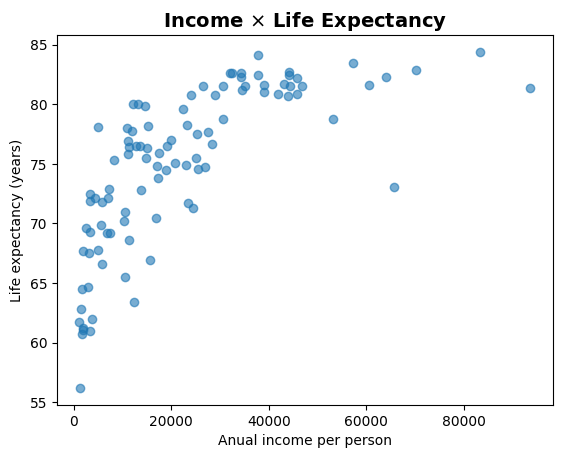

In [8]:
plt.scatter(df['income_per_person'], df['LifeExpect'], alpha=0.6) #gráficos de dispersão -> plt.scatter(x, y)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')

plt.show()

In [9]:
#cores dict

dict(zip(df.continent.unique(), ['r', 'g', 'b', 'c', 'm']))
{'Africa':'r', 'Americas':'g', 'Asia': 'b', 'Europe': 'c', 'Oceania': 'm'}


{'Africa': 'r', 'Americas': 'g', 'Asia': 'b', 'Europe': 'c', 'Oceania': 'm'}

In [10]:
#cores matplot

from matplotlib import cm

dict(zip(df.continent.unique(), cm.viridis(len(df.continent.unique()))))
{'Africa': 0.273809, 'Americas': 0.031497, 'Asia': 0.358853, 'Europe': 1.0}

{'Africa': 0.273809, 'Americas': 0.031497, 'Asia': 0.358853, 'Europe': 1.0}

In [11]:
#seaborn cores

dict(zip(df.continent.unique(), sns.color_palette("Set2", len(df.continent.unique()))))
{'Africa': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Americas': (0.9882352941156471, 0.5529411764705883, 0.3843137254901961),
 'Asia': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'Europe': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'Oceania': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)}

{'Africa': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Americas': (0.9882352941156471, 0.5529411764705883, 0.3843137254901961),
 'Asia': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'Europe': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'Oceania': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)}

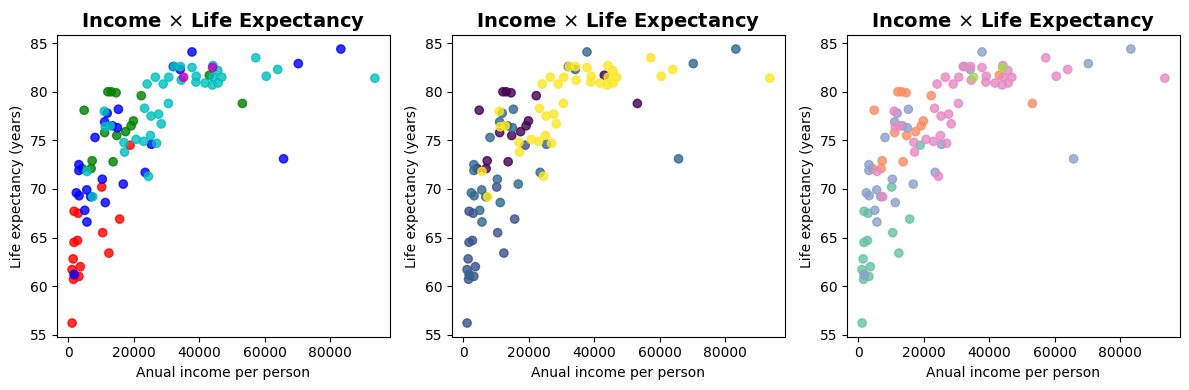

In [12]:
plt.figure(figsize=(12,4))

colors1= dict(zip(df.continent.unique(), ['r', 'g', 'b', 'c', 'm']))
colors2= dict(zip(df.continent.unique(), cm.viridis(len(df.continent.unique()))))
colors3= dict(zip(df.continent.unique(), sns.color_palette("Set2", len(df.continent.unique()))))

colors= [colors1, colors2, colors3]

for i in range(len(colors)):
  plt.subplot(1,3,i+1)
  plt.scatter(df['income_per_person'], df['LifeExpect'], alpha=0.8, c=df['continent'].map(colors[i]))

  plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
  plt.xlabel('Anual income per person')
  plt.ylabel('Life expectancy (years)')

plt.tight_layout()
plt.show()

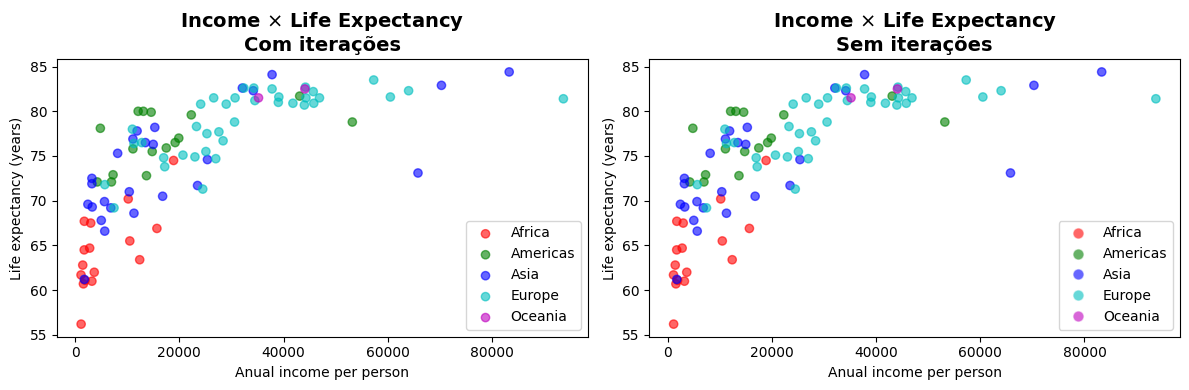

In [13]:
plt.figure(figsize=(12,4))

colors1= dict(zip(df.continent.unique(), ['r', 'g', 'b', 'c', 'm']))

plt.subplot(1,2,1)

for continent in df.continent.unique():
  plt.scatter(df[df['continent'] == continent]['income_per_person'],
              df[df['continent'] == continent]['LifeExpect'],
              c=df[df['continent'] == continent]['continent'].map(colors1),
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nCom iterações', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')

plt.legend()

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'],
            df['LifeExpect'],
            c=df['continent'].map(colors1),
            alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nSem iterações', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')

from matplotlib.lines import Line2D
legends=[]

for color in colors1.values():
  legends.append(Line2D([0], [0], markerfacecolor=color, marker='o', markersize=8, color='w', alpha=0.6))

plt.legend(legends, df['continent'].unique())

plt.tight_layout()
plt.show()

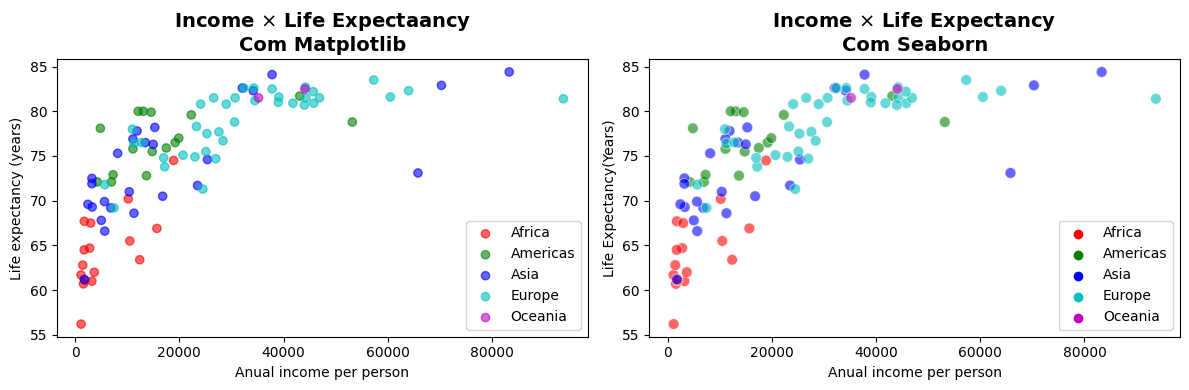

In [14]:
#parâmetro hue no seaborn

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[df['continent'] == continent]['income_per_person'],
              df[df['continent'] == continent]['LifeExpect'],
              c=df[df['continent'] == continent]['continent'].map(colors1),
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectaancy\nCom Matplotlib', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')
plt.legend()

plt.subplot(1,2,2)
colors= sns.color_palette(['r', 'g', 'b', 'c', 'm'])

sns.scatterplot(x = df['income_per_person'],
                y=df['LifeExpect'],
                hue=df['continent'],
                palette=colors,
                s=60,
                alpha=0.6)

plt.title('Income $\\times$ Life Expectancy \nCom Seaborn', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life Expectancy(Years)')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
dict(zip(df.continent.unique(), ['>','+','x','o','*']))
{'Africa': '>', 'Americas':'+', 'Asia': 'x', 'Europe': 'o', 'Oceania': '*'}

{'Africa': '>', 'Americas': '+', 'Asia': 'x', 'Europe': 'o', 'Oceania': '*'}

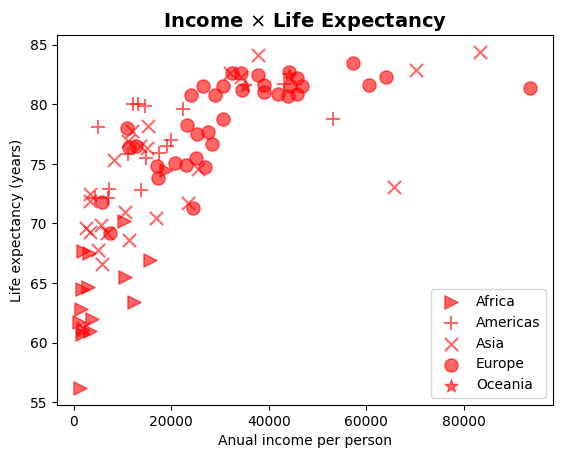

In [16]:
markers= dict(zip(df.continent.unique(),['>','+','x','o','*']))

for continent in df.continent.unique():
  plt.scatter(df[df['continent'] == continent]['income_per_person'],
  df[df['continent'] == continent]['LifeExpect'],
  marker=markers[continent], s=90, c='red',
  label=continent, alpha=0.6)


plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')
plt.legend()

plt.show()


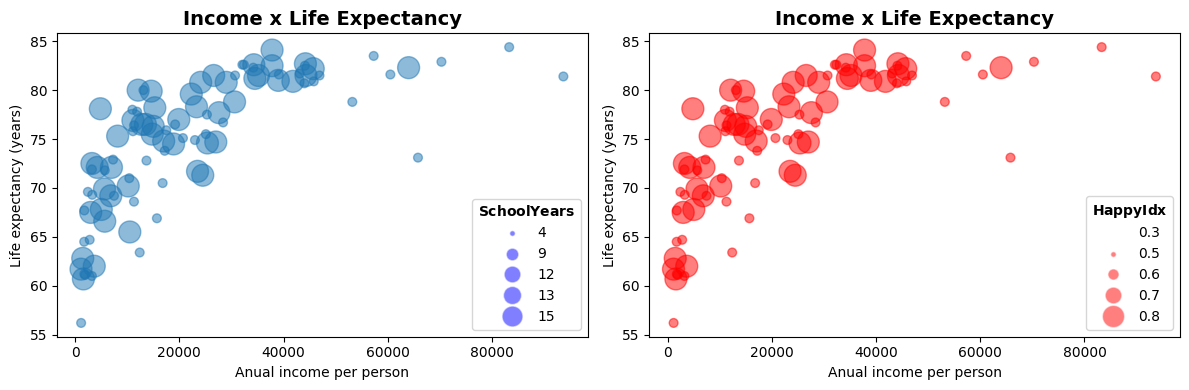

In [17]:
#método MUITO BOM

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'], df['LifeExpect'], s=df['SchoolYears15_24'], sizes=(40,250), alpha=0.5)

plt.title('Income x Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')

from matplotlib.lines import Line2D
legends=[]
valores= np.round(df['SchoolYears15_24'].quantile([0,0.25,0.5,0.75,1]),0).astype('int')

for size in valores:
  legends.append(Line2D([0], [0], markerfacecolor='blue', marker='o', markersize=size, color='w', alpha=0.5))

plt.legend(legends, valores, title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'], df['LifeExpect'], sizes=(40,250), s=df['HappyIdx'], alpha=0.5, c='red')

plt.title('Income x Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')

from matplotlib.lines import Line2D
legends=[]

valores=np.round(df['HappyIdx'].quantile([0,0.25,0.5,0.75,1]), 1)
for size, _ in enumerate(valores):
  legends.append(Line2D([0], [0], markerfacecolor='red', marker='o', markersize=size*4, color='w', alpha=0.5))

plt.legend(legends, valores, title='$\\bf{Happy Idx}$')

plt.tight_layout()
plt.show()

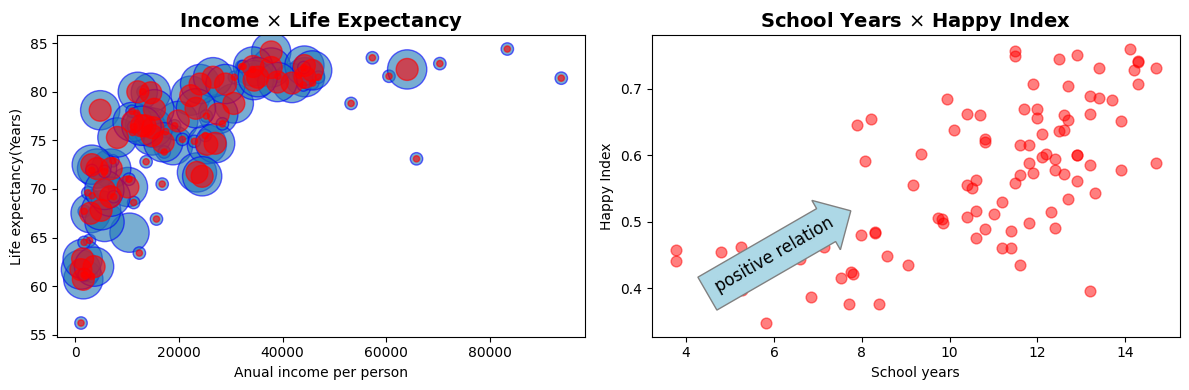

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'], df['LifeExpect'], sizes=(80,800), s=df['SchoolYears15_24'], alpha=0.6, edgecolor='b')
plt.scatter(df['income_per_person'], df['LifeExpect'], sizes=(20,250), s=df['HappyIdx'], alpha=0.6, edgecolor='r', c='red')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy(Years)')

plt.subplot(1,2,2)
plt.scatter(df['SchoolYears15_24'], df['HappyIdx'], s=60, c='r', alpha=0.5)
plt.title('School Years $\\times$ Happy Index', fontsize=14, weight='bold')
plt.xlabel('School years')
plt.ylabel('Happy Index')

bbox_props= dict(boxstyle="rarrow", fc='lightblue', ec='grey', lw=1)
t=plt.text(6, 0.45, 'positive relation', ha="center", va="center", rotation=30, size=12, bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

plt.tight_layout()
plt.show()

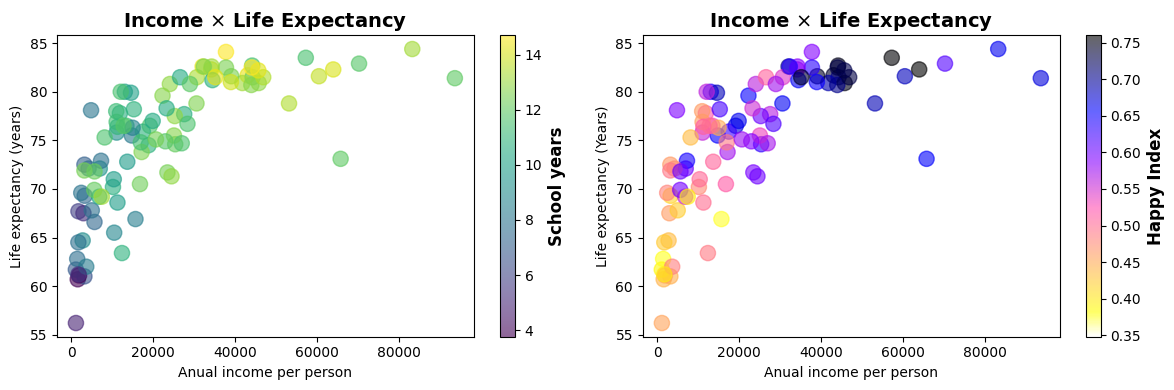

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'],df['LifeExpect'], alpha=0.6, s=120, c=df['SchoolYears15_24'], cmap=cm.viridis)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')

cbar= plt.colorbar()
cbar.set_label('School years', fontsize=12, weight='bold')

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'], df['LifeExpect'], alpha=0.6, s=120, c=df['HappyIdx'], cmap=cm.gnuplot2_r)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (Years)')

cbar= plt.colorbar()
cbar.set_label('Happy Index', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

<ipython-input-20-7fb1c5d814ab>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt_colbar= plt.scatter([], [], s=60, alpha=0.6, cmap=cm.viridis)


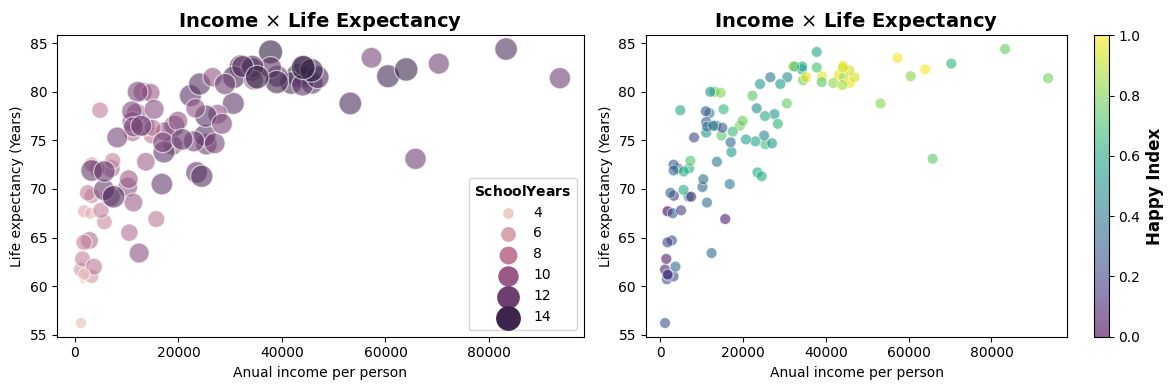

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
scatter= sns.scatterplot(x=df['income_per_person'], y=df['LifeExpect'], hue=df['SchoolYears15_24'], sizes=(40,300),
                         size=df['SchoolYears15_24'], alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (Years)')
plt.legend(title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt_colbar= plt.scatter([], [], s=60, alpha=0.6, cmap=cm.viridis)

scatter = sns.scatterplot(x=df['income_per_person'],
            y=df['LifeExpect'] ,
           # c=df['HappyIdx'],
            hue=df['HappyIdx'],
            palette=cm.viridis,
            s=60,
            alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (Years)')

cbar = plt.colorbar(plt_colbar)
cbar.set_label('Happy Index', fontsize=12, weight='bold')
scatter.get_legend().remove()

plt.tight_layout()
plt.show()

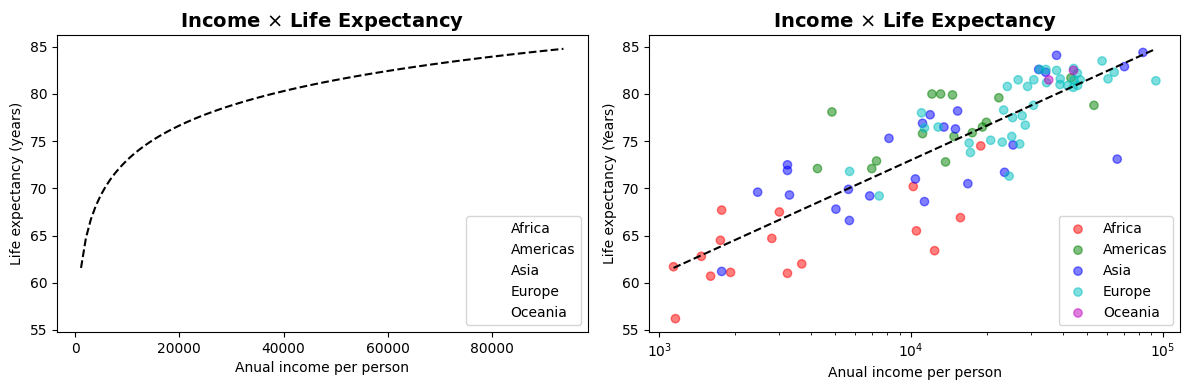

In [21]:
from scipy.optimize import curve_fit

def func(x, a, b):
  return a*np.log(x)+b

coefs, covar= curve_fit(func, df['income_per_person'], df['LifeExpect'])
x= np.linspace(df['income_per_person'].min(), df['income_per_person'].max(), 100)

y= func(x, *coefs)
plt.figure(figsize=(12, 4))
colors1 = dict(zip(df.continent.unique(), ['r', 'g', 'b', 'c', 'm']))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[df['continent'] == continent]['income_per_person'],
              df[df['continent'] == continent]['LifeExpect'],
              c=df[df['continent'] == continent]['continent'].map(colors1),
              label=continent, alpha=0)

plt.plot(x,y,color='black',linestyle='dashed',lw=1.5)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (years)')
plt.legend()

plt.subplot(1,2,2)
for continent in df.continent.unique():
  plt.scatter(df[df['continent'] == continent]['income_per_person'],
              df[df['continent'] == continent]['LifeExpect'],
              c=df[df['continent'] == continent]['continent'].map(colors1),
              label=continent, alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.xscale('log')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual income per person')
plt.ylabel('Life expectancy (Years)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [22]:
from IPython.display import display, Math, Latex
Math('\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(df["income_per_person"],df["LifeExpect"])[0,1]:.3f}')

<IPython.core.display.Math object>

In [23]:
Math('\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(np.log( df["income_per_person"] ),df["LifeExpect"])[0,1]:.3f}')

<IPython.core.display.Math object>

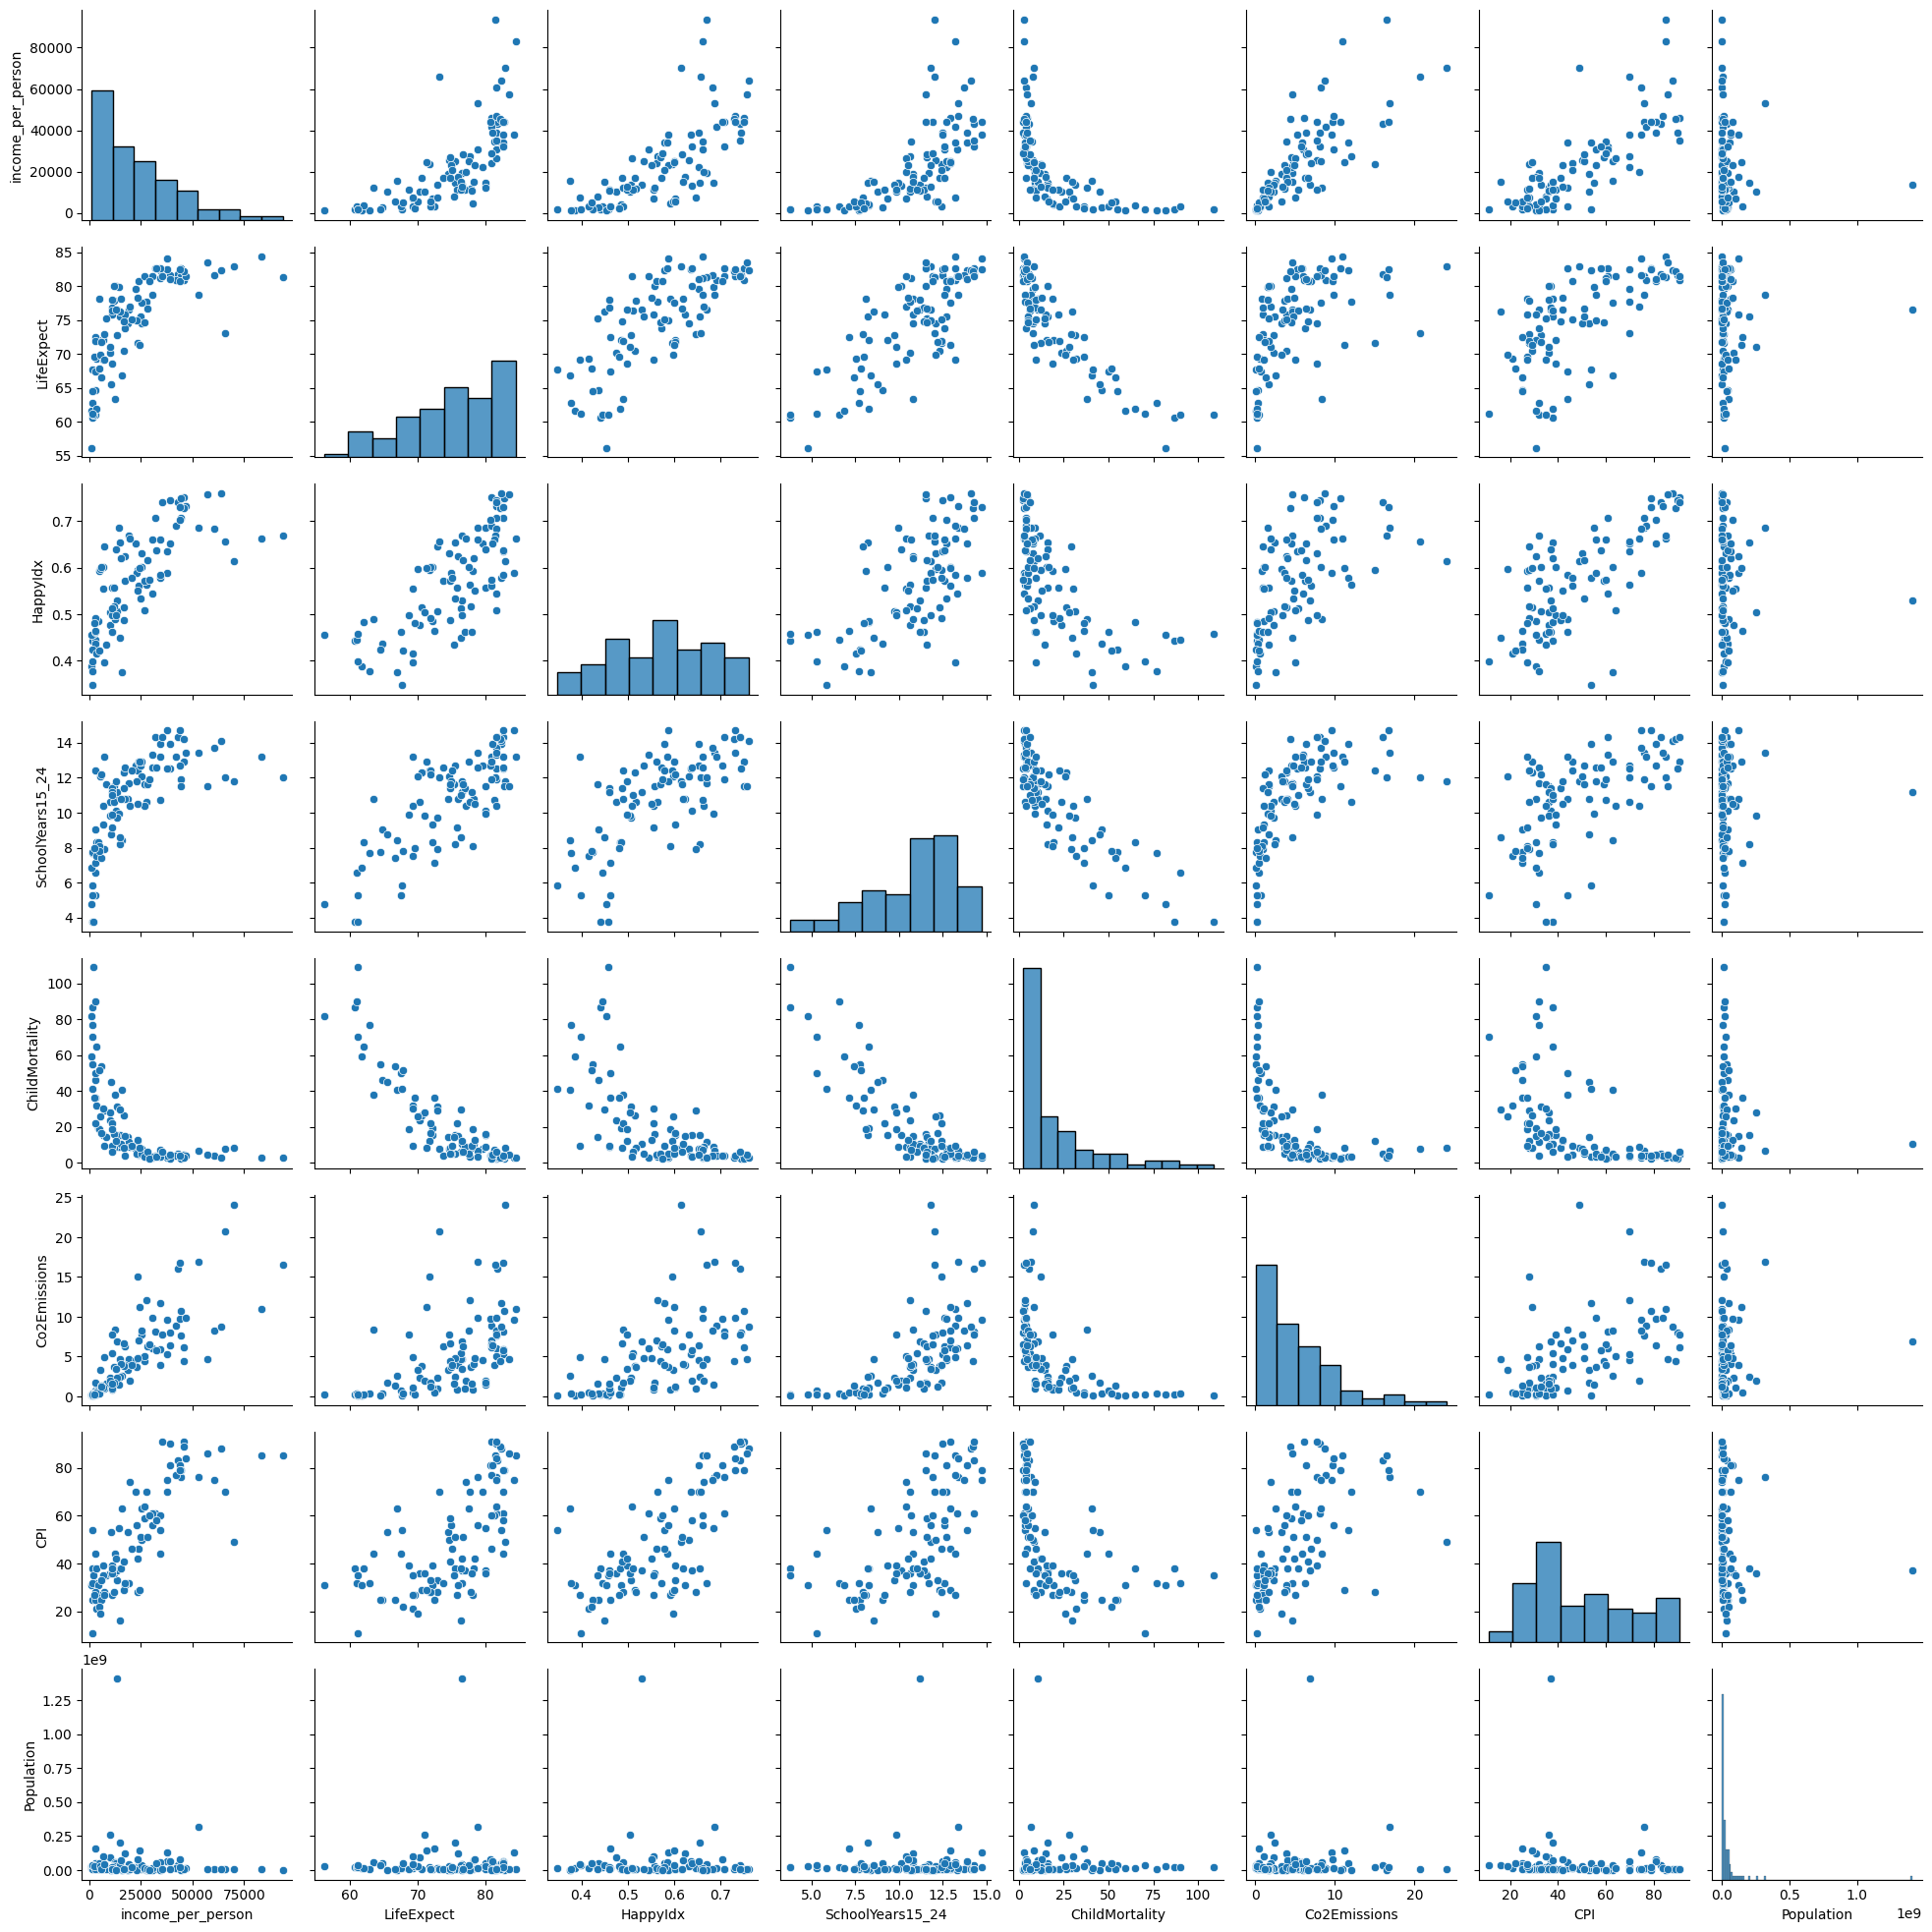

In [24]:
sns.pairplot(df[['income_per_person', 'LifeExpect', 'HappyIdx', 'SchoolYears15_24', 'ChildMortality', 'Co2Emissions', 'CPI', 'Population']])
plt.show()

In [25]:
pd.options.display.max_rows = 999

df[['income_per_person', 'LifeExpect', 'HappyIdx', 'SchoolYears15_24', 'ChildMortality', 'Co2Emissions', 'CPI', 'Population']].corr()

,income_per_person,LifeExpect,HappyIdx,SchoolYears15_24,ChildMortality,Co2Emissions,CPI,Population
income_per_person,1.000000,0.710835,0.727471,0.652686,-0.600019,0.796020,0.805391,-0.052656
LifeExpect,0.710835,1.000000,0.750452,0.772257,-0.878321,0.532751,0.651758,0.017118
HappyIdx,0.727471,0.750452,1.000000,0.661920,-0.656261,0.558667,0.729569,-0.030911
SchoolYears15_24,0.652686,0.772257,0.661920,1.000000,-0.851195,0.628866,0.583404,0.023106
ChildMortality,-0.600019,-0.878321,-0.656261,-0.851195,1.000000,-0.542851,-0.527718,-0.039804
Co2Emissions,0.796020,0.532751,0.558667,0.628866,-0.542851,1.000000,0.558390,0.059660
CPI,0.805391,0.651758,0.729569,0.583404,-0.527718,0.558390,1.000000,-0.086626
Population,-0.052656,0.017118,-0.030911,0.023106,-0.039804,0.059660,-0.086626,1.000000


In [32]:
# plt.figure(figsize=(12, 8))

# def linear(x, a, b):
#     return a*x + b

# for i, pairs in enumerate( [ ['LifeExpect','ChildMortality',],
#                 ['SchoolYears15_24','ChildMortality'],
#                 ['CPI','income_per_person'],
#                 ['Co2Emissions','income_per_person'] ] ):

#   coefs, covar = curve_fit(linear, df[pairs[0]], df[pairs[1]])
#   x = np.linspace(df[pairs[0]].min(), df[pairs[0]].max(), 100)
#   y = linear(x,*coefs)

#   plt.subplot(2,2,i+1)
#   plt.scatter(df[pairs[0]], df[pairs[1]], alpha=0.5)

#   plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

#   texto = f'Correlation =  {df[[pairs[0],pairs[1]]].corr().unstack()[1]:.2f} '
#   plt.text(( plt.gca().get_xlim()[1] + plt.gca().get_xlim()[0])/2,
#            ( plt.gca().get_ylim()[1] + plt.gca().get_ylim()[0])/2,
#            texto, ha='center', va='center', fontsize=18, color='red', alpha=0.8)

#   plt.title(pairs[0] + '$\\time$ ' + pairs[1], fontsize=14, weight='bold')
#   plt.xlabel(pairs[0])
#   plt.ylabel(pairs[1])

# plt.tight_layout()
# plt.show()

*MAPAS DE CALOR*

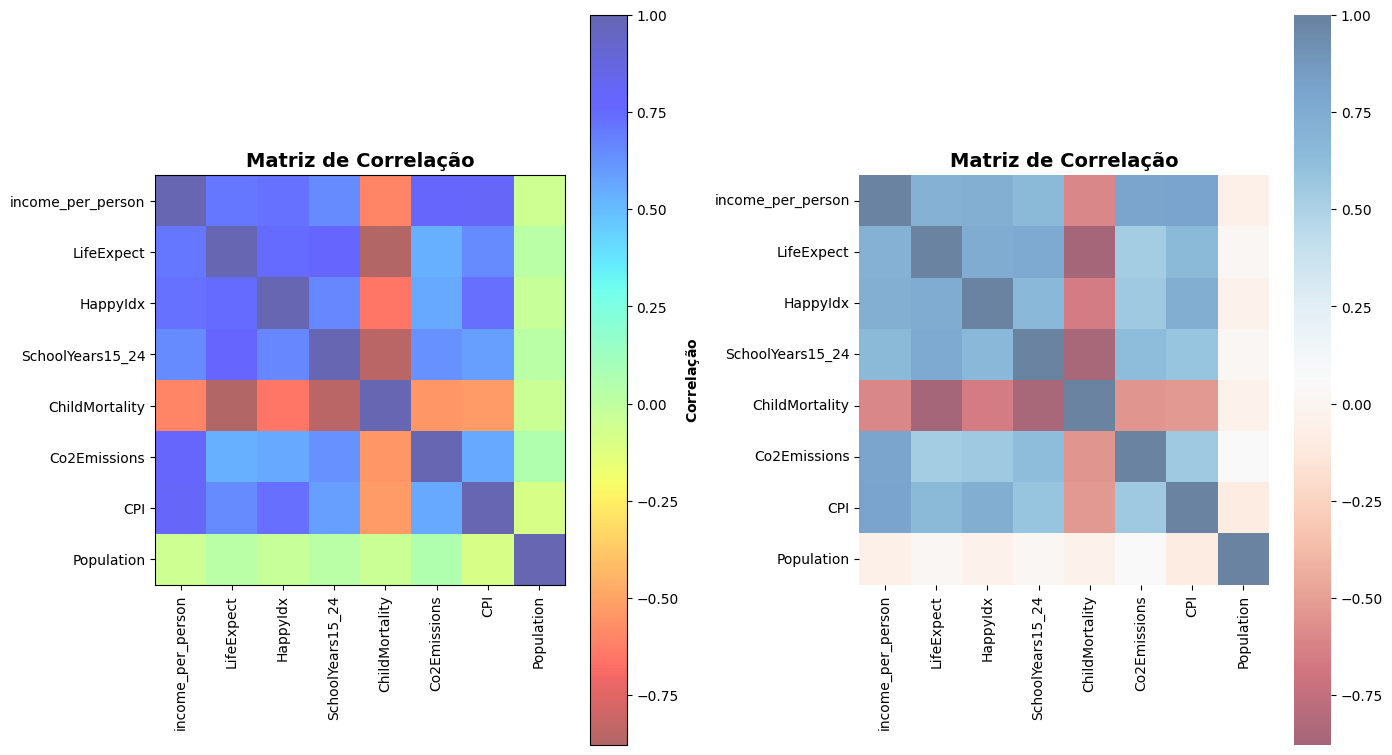

In [33]:
plt.figure(figsize=(14,8))

matriz = df[['income_per_person', 'LifeExpect', 'HappyIdx', 'SchoolYears15_24', 'ChildMortality', 'Co2Emissions', 'CPI', 'Population']].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len(matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len(matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6)

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

In [34]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [35]:
mpg_group = pd.DataFrame(mpg.groupby(['origin', 'model_year']).mpg.mean()).reset_index()
mpg_group.pivot('origin', 'model_year', 'mpg')

<ipython-input-35-35cb9b3a58a2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  mpg_group.pivot('origin', 'model_year', 'mpg')


model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,25.200000,28.75,22.000000,24.000000,27.000000,24.50,24.250000,29.250000,24.950000,30.450000,37.288889,31.575000,40.000000
japan,25.500000,29.50,24.200000,20.000000,29.333333,27.50,28.000000,27.416667,29.687500,32.950000,35.400000,32.958333,34.888889
usa,15.272727,18.10,16.277778,15.034483,18.333333,17.55,19.431818,20.722222,21.772727,23.478261,25.914286,27.530769,29.450000


<ipython-input-36-8a5735382ce5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(mpg_group.pivot('origin', 'model_year', 'mpg'), alpha=0.8)


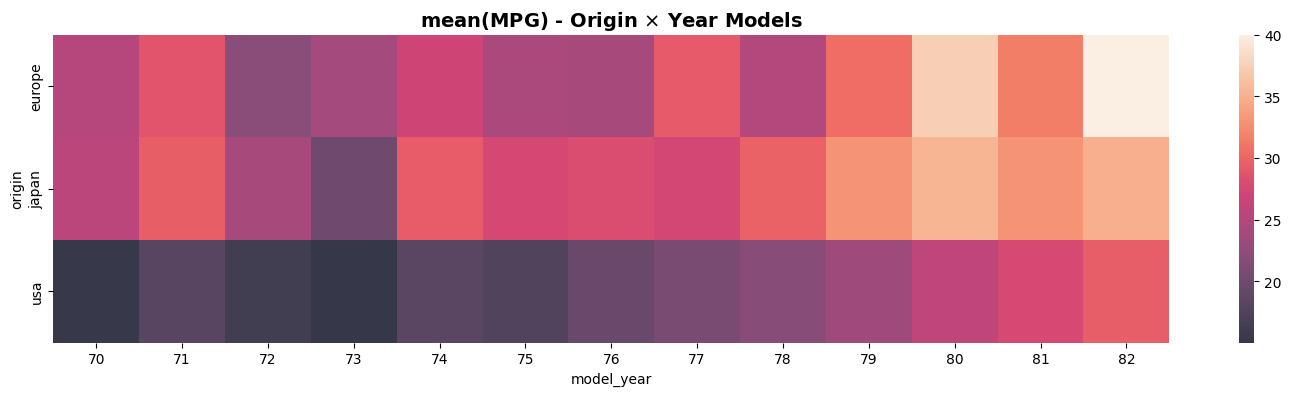

In [36]:
plt.figure(figsize=(18,4))
sns.heatmap(mpg_group.pivot('origin', 'model_year', 'mpg'), alpha=0.8)

plt.title('mean(MPG) - Origin $\\times$ Year Models', fontsize=14, weight='bold')
plt.show()

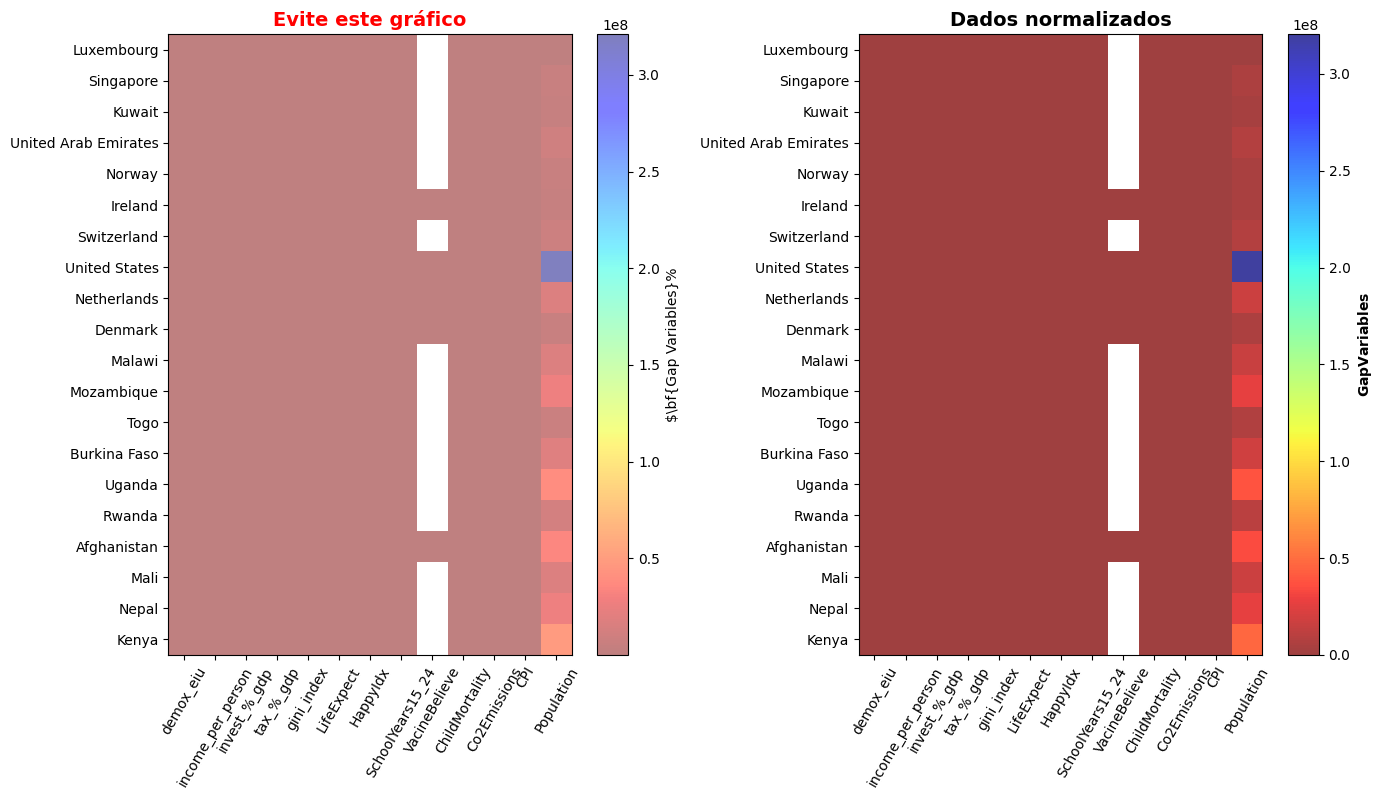

In [38]:
dfTop10 = df.nlargest(10, columns = 'income_per_person')
dfLow10 = df.nsmallest(10, columns= 'income_per_person')

df10 = pd.concat([dfTop10, dfLow10])

matriz = df10.drop(columns = ['continent', 'country', 'year', 'cod_continent'])

matriz_norm = (matriz - matriz.min()/matriz.max()-matriz.min())

plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.5)
plt.yticks(np.arange(len(df10['country'])), df10['country'])
plt.xticks(np.arange(len(matriz.columns)), matriz.columns, rotation=60)
cbar = plt.colorbar()
cbar.set_label('$\\bf{Gap Variables}%')

plt.title('Evite este gráfico', fontsize=14, weight='bold', color='r')

plt.subplot(1,2,2)
plt.imshow(matriz_norm, cmap='jet_r', alpha=0.75)
plt.yticks(np.arange(len(df10['country'])), df10['country'])
plt.xticks(np.arange(len(matriz_norm.columns)),matriz_norm.columns,rotation=60)

cbar = plt.colorbar()
cbar.set_label('$\\bf{Gap Variables}$')

plt.title('Dados normalizados', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

In [39]:
print('Dados com valores ausentes:', df.isnull().values.any())

df= df.drop(columns=['VacineBelieve'])
df= df.dropna().reset_index(drop=True)

print('Dados com valores ausentes:', df.isnull().values.any())

Dados com valores ausentes: True
Dados com valores ausentes: False


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
x= df[['income_per_person', 'LifeExpect', 'HappyIdx', 'SchoolYears15_24', 'ChildMortality', 'Co2Emissions', 'CPI', 'Population']]
features= x.columns
x= StandardScaler().fit_transform(x)
x= pd.DataFrame(x, columns = features)

x.head()

,income_per_person,LifeExpect,HappyIdx,SchoolYears15_24,ChildMortality,Co2Emissions,CPI,Population
0,-0.378566,-1.239440,-1.850791,-0.980125,0.945894,-0.574424,0.642906,-0.308834
1,-1.104401,-2.172864,-1.226559,-2.817651,2.984586,-1.061338,-0.533444,-0.202322
2,-1.020492,-2.127698,-1.198185,-1.696919,3.126100,-1.015677,-0.815768,-0.168329
3,-0.661693,-0.742618,-0.904986,-0.108884,0.189676,-0.613328,-0.627552,0.292911
4,-1.042628,-1.570655,-1.283308,-0.718753,1.193544,-1.028782,-1.145146,-0.003695


In [44]:
pca = PCA(n_components=2)
PC2= pca.fit_transform(x)

PC2= pd.DataFrame(PC2, columns = ['PComp1','PComp2'])
df= pd.concat([df, PC2], axis=1)
df.head()

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index,LifeExpect,HappyIdx,SchoolYears15_24,ChildMortality,Co2Emissions,CPI,Population,cod_continent,PComp1,PComp2
0,Africa,Botswana,2015,78.7,15700,32.1,24.7,60.5,66.9,0.376,8.40,40.7,2.560,63.0,2120000,0,2.044587,-0.613808
1,Africa,Burkina Faso,2015,47.0,1600,24.3,15.1,35.5,60.7,0.442,3.76,86.8,0.182,38.0,18100000,0,4.537997,-0.822175
2,Africa,Cote d'Ivoire,2015,33.1,3230,20.1,15.4,41.6,61.0,0.445,6.59,90.0,0.405,32.0,23200000,0,4.185610,-0.644831
3,Africa,Egypt,2015,31.8,10200,14.3,12.5,31.2,70.2,0.476,10.60,23.6,2.370,36.0,92400000,0,1.455138,0.401299
4,Africa,Kenya,2015,53.3,2800,21.5,16.3,41.5,64.7,0.436,9.06,46.3,0.341,25.0,47900000,0,3.022230,-0.005218


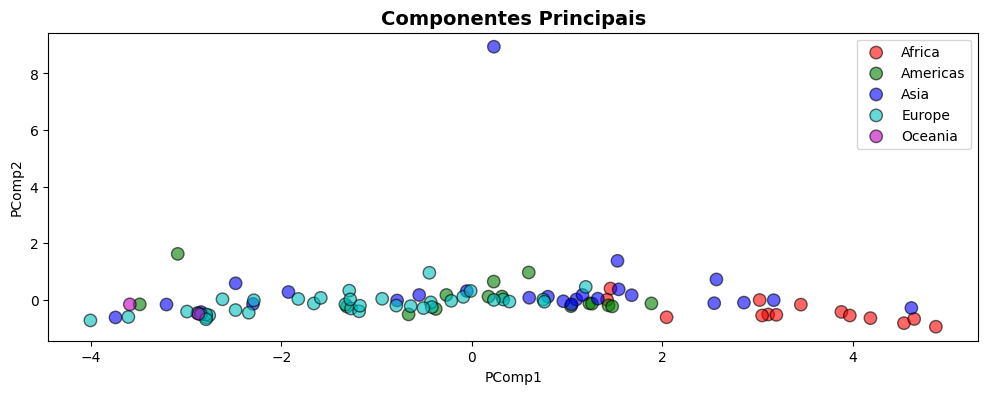

In [46]:
plt.figure(figsize=(12,4))

colors1= dict(zip(df.continent.unique(), ['r','g','b','c','m']))

for continent in df.continent.unique():
  plt.scatter(df[df['continent'] == continent]['PComp1'],
              df[df['continent'] == continent]['PComp2'],
              c=df[df['continent'] == continent]['continent'].map(colors1),
              label=continent, s=80, edgecolor='k', alpha=0.6)

plt.title('Componentes Principais', fontsize=14, weight='bold')
plt.xlabel('PComp1')
plt.ylabel('PComp2')
plt.legend()
plt.show()